In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV



>**Introduction:
We have the breast cancer data set to predict if a cancer is malignant or not. In this dataset, I stated with some exploratory data analysis. Then I used classification models, Logistic Regression, KNN, Random Forest and Decision Tree to classify the data. I also hypertuned the model to get better results.
******

In [5]:
data_df=pd.read_csv(r'Breast_cancer_data.csv')
data_df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [6]:
data_df.shape


(569, 6)

In [ ]:
data_df["diagnosis"].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
data_df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
data_df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

(array([ 93., 251., 101.,  47.,  51.,  14.,   6.,   3.,   1.,   2.]),
 array([ 143.5 ,  379.25,  615.  ,  850.75, 1086.5 , 1322.25, 1558.  ,
        1793.75, 2029.5 , 2265.25, 2501.  ]),
 <a list of 10 Patch objects>)

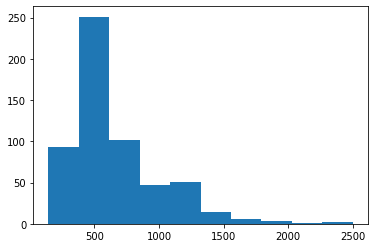

In [ ]:
plt.hist(data_df['mean_area'])

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

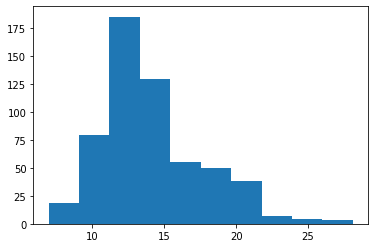

In [ ]:
plt.hist(data_df['mean_radius'])

(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([ 9.71 , 12.667, 15.624, 18.581, 21.538, 24.495, 27.452, 30.409,
        33.366, 36.323, 39.28 ]),
 <a list of 10 Patch objects>)

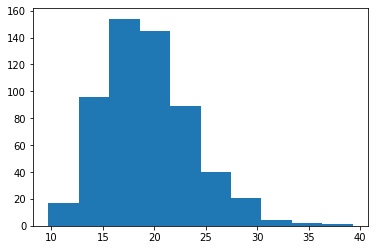

In [ ]:
plt.hist(data_df['mean_texture'])

(array([ 15.,  93., 185., 116.,  62.,  49.,  34.,   8.,   3.,   4.]),
 array([ 43.79 ,  58.261,  72.732,  87.203, 101.674, 116.145, 130.616,
        145.087, 159.558, 174.029, 188.5  ]),
 <a list of 10 Patch objects>)

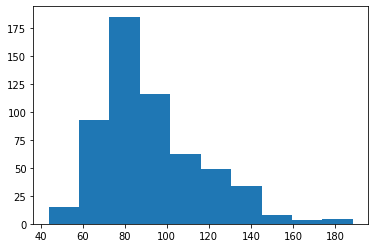

In [ ]:
plt.hist(data_df['mean_perimeter'])

(array([  2.,  26., 110., 160., 164.,  79.,  20.,   5.,   2.,   1.]),
 array([0.05263 , 0.063707, 0.074784, 0.085861, 0.096938, 0.108015,
        0.119092, 0.130169, 0.141246, 0.152323, 0.1634  ]),
 <a list of 10 Patch objects>)

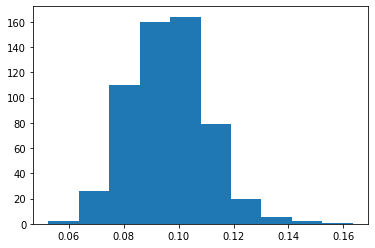

In [ ]:
plt.hist(data_df['mean_smoothness'])

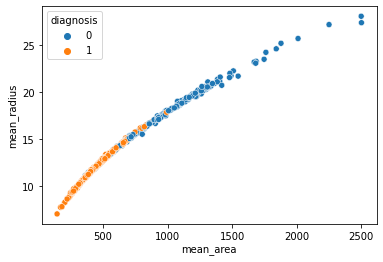

In [ ]:
sns.scatterplot(x=data_df['mean_area'],y=data_df['mean_radius'],hue=data_df['diagnosis'])

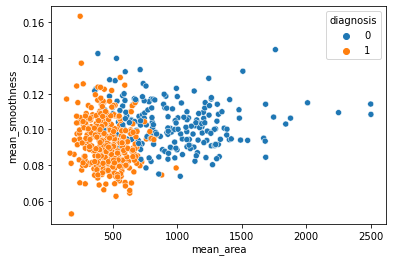

In [ ]:
sns.scatterplot(x=data_df['mean_area'],y=data_df['mean_smoothness'],hue=data_df['diagnosis'])

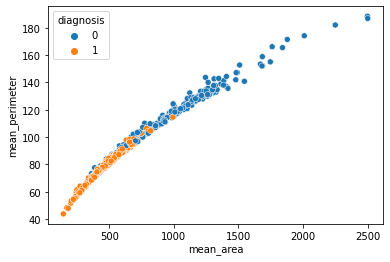

In [ ]:
sns.scatterplot(x=data_df['mean_area'],y=data_df['mean_perimeter'],hue=data_df['diagnosis'])

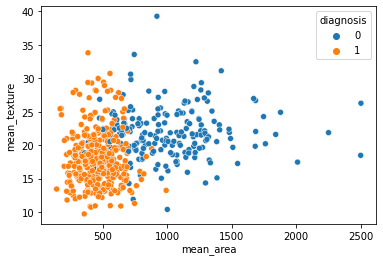

In [ ]:
sns.scatterplot(x=data_df['mean_area'],y=data_df['mean_texture'],hue=data_df['diagnosis'])

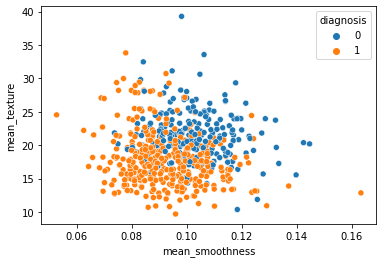

In [ ]:
sns.scatterplot(x=data_df['mean_smoothness'],y=data_df['mean_texture'],hue=data_df['diagnosis'])

In [ ]:
data_df.corr() # Correlation between various parameters

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


Mean Radius, Mean Perimeter and Mean Area are highly correlated.

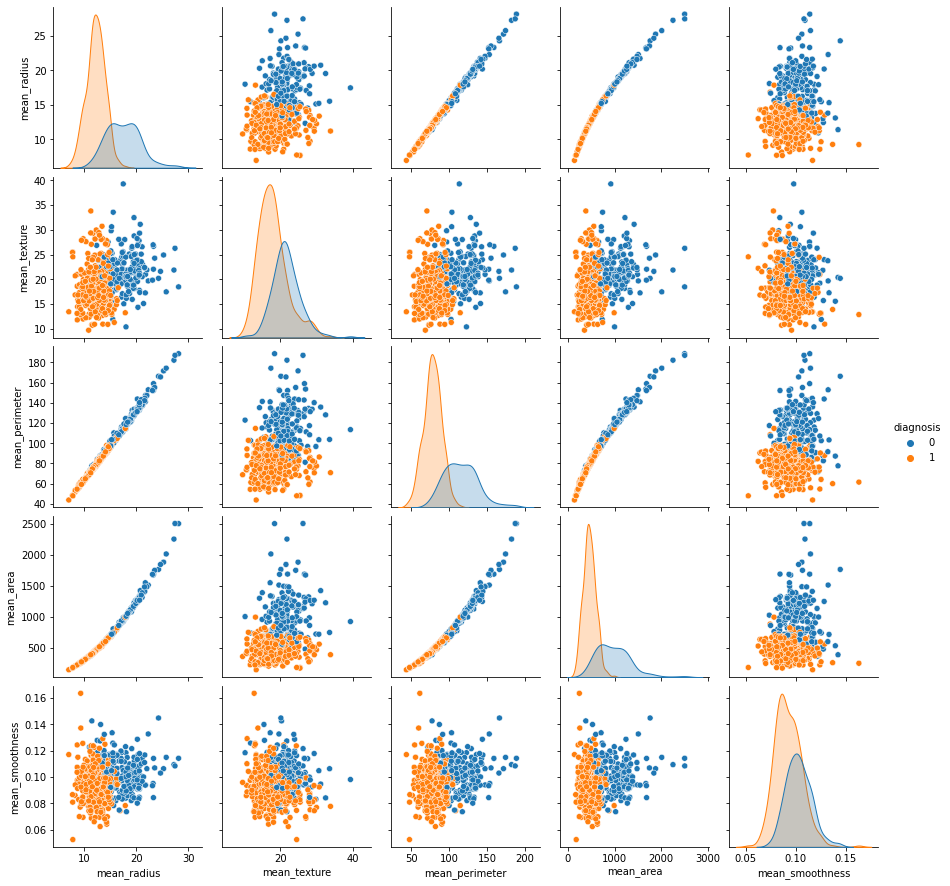

In [ ]:
sns.pairplot(data_df,hue='diagnosis')

In [ ]:
x= data_df.drop('diagnosis',1) # Dropped diagnosis column
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [ ]:
y= data_df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=10) # Spliting dataset for training and testing

In [ ]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
567,20.60,29.33,140.10,1265.0,0.11780
295,13.77,13.27,88.06,582.7,0.09198
91,15.37,22.76,100.20,728.2,0.09200
1,20.57,17.77,132.90,1326.0,0.08474
94,15.06,19.83,100.30,705.6,0.10390
...,...,...,...,...,...
369,22.01,21.90,147.20,1482.0,0.10630
320,10.25,16.18,66.52,324.2,0.10610
527,12.34,12.27,78.94,468.5,0.09003
125,13.85,17.21,88.44,588.7,0.08785


In [ ]:
X_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
172,15.460,11.89,102.50,736.9,0.12570
553,9.333,21.94,59.01,264.0,0.09240
374,13.690,16.07,87.84,579.1,0.08302
370,16.350,23.29,109.00,840.4,0.09742
419,11.160,21.41,70.95,380.3,0.10180
...,...,...,...,...,...
188,11.810,17.39,75.27,428.9,0.10070
429,12.720,17.67,80.98,501.3,0.07896
399,11.800,17.26,75.26,431.9,0.09087
323,20.340,21.51,135.90,1264.0,0.11700


In [ ]:
Y_test

172    0
553    1
374    1
370    0
419    1
      ..
188    1
429    1
399    1
323    0
262    0
Name: diagnosis, Length: 114, dtype: int64

In [ ]:
Y_train

567    0
295    1
91     0
1      0
94     0
      ..
369    0
320    1
527    1
125    1
265    0
Name: diagnosis, Length: 455, dtype: int64


```

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, PrecisionRecallDisplay, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
scaler = StandardScaler() # scaler is object of class StandardScaler
X_train_scale = scaler.fit_transform(X_train) # standardizing training data x scale
X_test_scale = scaler.transform(X_test) # standarding test data x scale
logit_model = LogisticRegression()
logit_model.fit(X_train_scale,Y_train)
# learns mean and variance from the different columns
X_pred = logit_model.predict(X_test_scale) # predicting for x test data set
logit_model.score(X_test_scale,Y_test) # score gives the probability of the correct prediction given by our model for the test dataset

0.9210526315789473

In [ ]:
confusion_matrix(X_pred,Y_test)

array([[35,  5],
       [ 4, 70]])

In [ ]:
accuracy_score(X_pred,Y_test)

0.9210526315789473

In [ ]:
MinMaxscaler = MinMaxScaler()
X_train_scale = MinMaxscaler.fit_transform(X_train)
X_test_scale = MinMaxscaler.transform(X_test)
logit_model = LogisticRegression()
logit_model.fit(X_train_scale,Y_train)
Y_pred = logit_model.predict(X_test_scale)
logit_model.score(X_test_scale,Y_test)

0.8859649122807017

In [ ]:
logit_confusion = confusion_matrix(Y_test,Y_pred)

In [ ]:
logit_confusion

array([[30,  9],
       [ 4, 71]])

In [ ]:
precision_score(Y_test,Y_pred)

0.8875

In [ ]:
recall_score(Y_test,Y_pred)

0.9466666666666667

In [ ]:
f1_score(Y_test,Y_pred)

0.9161290322580645

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model_test = RandomForestClassifier(max_depth=40,random_state=42)
forest_model_test.fit(X_train,Y_train)
Y_random_model_test =forest_model_test.predict(X_test)

In [ ]:
forest_param = {'n_estimators':[500,700,1000],'max_depth':[10,20,40,70]}
forest_Gridsearch = GridSearchCV(estimator=forest_model_test,param_grid=forest_param,cv=10,scoring='f1',n_jobs=-1)
forest_Gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=40, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40, 70],
                         'n_estimators': [500, 700, 1000]},
             scoring='f1')

In [ ]:
forest_Gridsearch.best_params_

{'max_depth': 10, 'n_estimators': 700}

In [ ]:
forest_model_best= RandomForestClassifier(n_estimators=700,max_depth=10)

In [ ]:
forest_model_best.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, n_estimators=700)

In [ ]:
Y_random_model =forest_model_best.predict(X_test)

In [ ]:
forest_confusion = confusion_matrix(Y_random_model,Y_test)

In [ ]:
forest_confusion

array([[33,  5],
       [ 6, 70]])

In [ ]:
forest_model_best.score(X_test,Y_test)

0.9035087719298246

In [ ]:
precision_score(Y_test,Y_random_model)


0.9210526315789473

In [ ]:
recall_score(Y_test,Y_random_model)

0.9333333333333333

In [ ]:
False_negative_rate_Forest = forest_confusion[1][0]/(forest_confusion[1][0]+forest_confusion[1][1])

In [ ]:
False_negative_rate_Forest*100

7.894736842105263

# **K** Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train_scale,Y_train)
Y_KNN =KNN_model.predict(X_test_scale)

In [ ]:
KNN_Confusion = confusion_matrix(Y_KNN,Y_test)
# Confusion matrix between actual results and the predications made by naive model
# The model in naive because we don't know yet that making group of 10 neighbours will give us the highest accuracy

In [ ]:
KNN_Confusion

array([[32,  3],
       [ 7, 72]])

In [ ]:
accuracy_score(Y_test,Y_KNN)

0.9122807017543859

In [ ]:
recall_score(Y_test,Y_KNN)

0.96

In [ ]:
precision_score(Y_test,Y_KNN)

0.9113924050632911

In [ ]:
# Way to determine which parameters give the best result

KNN_param = {'n_neighbors':[4,5,6,7,8,9,10,14,15,20,25],'weights':['uniform','distance']}
# each element of N neighbours represent the number of members that can be present in a group segreggated by our model
# weights refers to the weight that is given in the model to give predictions therefore there will be two predictions for each N-Neighbour element, one by taking 'uniform' as weight and other by taking 'distance' as weight

KNN_Grid = GridSearchCV(estimator=KNN_model,param_grid=KNN_param,cv=10,scoring='f1',n_jobs=-1)
# KNN Grid is a ML version of for-loop
# There will be 10(=cv) for loops; each for loop will take a random element from the list of N-neighbours as its designated neighbour on which model works
KNN_Grid.fit(X_train_scale,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10), n_jobs=-1,
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 14, 15, 20, 25],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
KNN_Grid.best_params_ # Best parameters chosen on the basis of f1 score

{'n_neighbors': 14, 'weights': 'distance'}

In [ ]:
KNN_Grid.best_score_

0.9479182692807067

In [ ]:
KNN_model_best = KNeighborsClassifier(n_neighbors=14,weights='distance') #Implying model using the best of parameters that were determined above

In [ ]:
KNN_model_best.fit(X_train_scale,Y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [ ]:
Y_KNN_best = KNN_model_best.predict(X_test_scale)

In [ ]:
KNN_CM= confusion_matrix(Y_test,Y_KNN_best)  # Confusion matrix between actual results and the predications made by the model (model which was made by using best parameters)

In [ ]:
KNN_CM

array([[33,  6],
       [ 4, 71]])

In [ ]:
precision_score(Y_test,Y_KNN_best)

0.922077922077922

In [ ]:
recall_score(Y_test,Y_KNN_best)

0.9466666666666667

In [ ]:
f1_score(Y_test,Y_pred)

0.9342105263157895

In [ ]:
False_negative_rate_KNN = KNN_CM[1][0]/(KNN_CM[1][0]+KNN_CM[1][1])
# low false negative rate is better than high accuracy
# FN Rate = FN/(FN+TP)
# TP - True positive; FN - False negative

In [ ]:
False_negative_rate_KNN*100

5.333333333333334

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Tree_model_test = DecisionTreeClassifier(max_depth = 10)
Tree_model_test.fit(X_train,Y_train)
Y_tree_test = Tree_model_test.predict(X_test)


In [ ]:
confusion_matrix(Y_test,Y_tree_test)

array([[32,  7],
       [ 7, 68]])

In [ ]:
Tree_param = {'max_depth':[50,70,20,10],'min_samples_split':[2,4,8],'min_samples_leaf':[2,4,8]}
Tree_search = GridSearchCV(estimator=Tree_model_test,cv=10,scoring='f1',n_jobs=-1,param_grid=Tree_param)

In [ ]:
Tree_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [50, 70, 20, 10],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='f1')

In [ ]:
Tree_search.best_params_

{'max_depth': 50, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [ ]:
Tree_model = RandomForestClassifier(max_depth=70,min_samples_leaf=8,min_samples_split=4)

In [ ]:
Tree_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=8, min_samples_split=4)

In [ ]:
Y_tree= Tree_model.predict(X_test)

In [ ]:
Tree_model.score(X_test,Y_test)

0.9122807017543859

In [ ]:
Tree_confusion = confusion_matrix(Y_test,Y_tree)

In [ ]:
Tree_confusion

array([[32,  7],
       [ 3, 72]])

In [ ]:
accuracy_score(Y_test,Y_tree)

0.9122807017543859

In [ ]:
precision_score(Y_test,Y_tree)

0.9113924050632911

In [ ]:
recall_score(Y_test,Y_tree)

0.96

In [ ]:
False_negetive_rate_Tree = Tree_confusion[1][0]/(Tree_confusion[1][0]+Tree_confusion[1][1])

In [ ]:
False_negetive_rate_Tree*100

4.0

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM_model = SVC(C=100, kernel='linear')
SVM_model.fit(X_train_scale,Y_train)

SVC(C=100, kernel='linear')

In [ ]:
Y_SVM = SVM_model.predict(X_test_scale)

In [ ]:
confusion_matrix(Y_test,Y_SVM)

array([[35,  4],
       [ 5, 70]])

In [ ]:
accuracy_score(Y_test,Y_SVM)

0.9210526315789473

In [ ]:
recall_score(Y_test,Y_SVM)

0.9333333333333333

In [ ]:
precision_score(Y_test,Y_SVM)

0.9459459459459459

In [ ]:
SVM_param = [{"C":[1,10,100,1000],'kernel':['linear']},{"C":[1,10,100,1000],'kernel':['rbf','sigmoid'],'gamma':[0.1,1,10]}] # Refer C and gamma from link in research paper doc
grid_SVM = GridSearchCV(estimator=SVM_model, param_grid=SVM_param,cv=10,scoring="f1", n_jobs=-1)

In [ ]:
grid_SVM.fit(X_train_scale,Y_train)

GridSearchCV(cv=10, estimator=SVC(C=100, kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.1, 1, 10],
                          'kernel': ['rbf', 'sigmoid']}],
             scoring='f1')

In [ ]:
grid_SVM.best_score_

0.951484461207045

In [ ]:
grid_SVM.best_params_

{'C': 100, 'gamma': 10, 'kernel': 'rbf'}

In [ ]:
SVM_model_best = SVC(C=100,kernel='rbf',gamma=10)

In [ ]:
SVM_model_best.fit(X_train_scale,Y_train)

SVC(C=100, gamma=10)

In [ ]:
Y_SVM_best = SVM_model_best.predict(X_test_scale)

In [ ]:
SVM_CM= confusion_matrix(Y_test,Y_SVM_best)
SVM_CM

array([[32,  7],
       [ 4, 71]])

In [ ]:
accuracy_score(Y_test,Y_SVM_best)

0.9035087719298246

In [ ]:
recall_score(Y_test,Y_SVM_best)

0.9466666666666667

In [ ]:
precision_score(Y_test,Y_SVM_best)

0.9102564102564102

In [ ]:
f1_score(Y_test,Y_pred)

0.9161290322580645

In [ ]:
False_negative_rate = SVM_CM[1][0]/(SVM_CM[1][0]+SVM_CM[1][1])

In [ ]:
False_negative_rate*100

5.333333333333334

Conclusion
- Five classification models; Logistic Regression, k-Nearest Neighbour(KNN), Support Vector Machine(SVM), Decision Tree and Random Forest were used to classify the data.

- Hypertuning was done in SVM, Decision Tree, Random Forest and kNN to get the best results.

- Variables were scaled for KNN, SVM, Logitic Regresion model. The Decision Tree model does not need to be scaled as no distance is calculated for this model.

- Each model provides high accuracy with Logistic Regression being the lowest with 88% and all the other model provide an accuracy of more than 90%.

- As the model predicts cancer, false negative rate is more important than accuracy. False negative rate is FN/(FN+TP).

- Decision Tree model with hypertuning provides the best(least) False Negative rate at 4%.
